In [11]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
np.random.seed(42)                      
from keras.models import Sequential             
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.optimizers import Adam, SGD

In [28]:
PATH_TO_DATA = '../../images/train_ocr/'
images = os.listdir(PATH_TO_DATA)

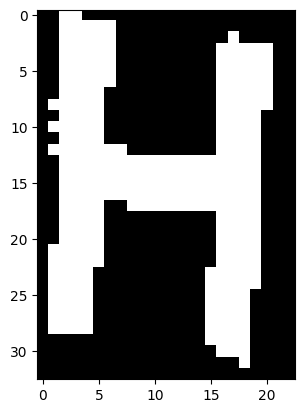

In [29]:
# Load images and labels into numpy arrays
X = []
y = []

for image in images:
    img = Image.open(PATH_TO_DATA + image)
    # convert to black and white
    img = img.convert('L')
    img = np.array(img) / 255
    # array to int
    img = img.astype(int)
    X.append(img)
    y.append(image[0])

X = np.array(X)
y = np.array(y)

X.shape, y.shape
plt.imshow(X[30], cmap='gray')

In [30]:
# Convert arrays to vectors
# X = X.reshape(X.shape[0], -1)
y = y.reshape(y.shape[0], -1)

X.shape, y.shape

((10002, 33, 23), (10002, 1))

In [31]:
# Convert labels to one-hot encoding
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y = lb.fit_transform(y)

y.shape

(10002, 27)

In [32]:
import pickle
# Save the label encoder lb
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(lb, f)

In [33]:
num_classes = y.shape[1]
num_pixels = X.shape[1]

num_classes, num_pixels

(27, 33)

In [34]:
def baseline_model():
    # create model
    model = Sequential()
    # Convolutional layer with rectified linear unit activation
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(33, 23, 1)))
    # Max pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))

    # Softmax layer
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))
    

    
    return model

# build the model
model = baseline_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 31, 21, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 10, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 8, 64)         18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 4, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 2, 32)          18464     
                                                                 
 flatten_2 (Flatten)         (None, 256)              

In [35]:
opt = SGD(lr = 0.001)
model.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])

In [36]:
model.fit(X, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50


2024-05-06 13:43:21.585012: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 60732144 exceeds 10% of free system memory.


313/313 [==============================] - 8s 21ms/step - loss: 2.4065 - accuracy: 0.3701
Epoch 2/50
313/313 [==============================] - 6s 21ms/step - loss: 0.1449 - accuracy: 0.9587
Epoch 3/50
313/313 [==============================] - 7s 21ms/step - loss: 0.0412 - accuracy: 0.9920
Epoch 4/50
313/313 [==============================] - 7s 21ms/step - loss: 0.0167 - accuracy: 0.9989
Epoch 5/50
313/313 [==============================] - 6s 21ms/step - loss: 0.0095 - accuracy: 1.0000
Epoch 6/50
313/313 [==============================] - 7s 21ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 7/50
313/313 [==============================] - 7s 21ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 8/50
313/313 [==============================] - 7s 21ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 9/50
313/313 [==============================] - 7s 21ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 10/50
313/313 [==============================] - 7s 21ms/step - loss: 0.0023 - accuracy: 1.0000


In [37]:
model.save('ocr_model.h5')

/home/mees/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
